## Data Exploration
In our initial exploration, we will load the data sets and see what data attributes are available to us. We will also plot the variables, to see if we can find some trends in the data, and explore the possibility of engineering some additional features. We will do the data loading and analysis in pandas, so let us load that library and begin exploring.

In [1]:
import pandas as pd

In [2]:
# load the training set
df_train = pd.read_csv('datasets/AMZN_train.csv')

In [3]:
# (#rows, #columns)
df_train.shape

(4781, 7)

In [4]:
df_train.head(10)

Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200
5  1997-05-22  1.437500  1.447917  1.312500  1.395833   1.395833  11776800
6  1997-05-23  1.406250  1.520833  1.333333  1.500000   1.500000  15937200
7  1997-05-27  1.510417  1.645833  1.458333  1.583333   1.583333   8697600
8  1997-05-28  1.625000  1.635417  1.531250  1.531250   1.531250   4574400
9  1997-05-29  1.541667  1.541667  1.479167  1.505208   1.505208   3472800

Pandas' `info()` method is really useful to get a quick peek at the column names, types, non-null counts, as well as the data set's memory size! We have mostly numerical columns (5 floats, 1 int) and an object column - the date. No null values at all, and just `261 KB` in size.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


The training data set consists of `4781 rows` and `7 columns`. These are presented above. In the cell below, we use the `describe()` method to get a quick overview of our data set.

In [6]:
df_train.describe()

Open         High          Low        Close    Adj Close  \
count  4781.000000  4781.000000  4781.000000  4781.000000  4781.000000   
mean    127.619845   129.480122   125.697925   127.662449   127.662449   
std     145.693083   147.132537   144.053633   145.677581   145.677581   
min       1.406250     1.447917     1.312500     1.395833     1.395833   
25%      34.299999    34.849998    33.660000    34.310001    34.310001   
50%      62.880001    64.750000    60.937500    62.750000    62.750000   
75%     189.009995   191.600006   186.210007   189.029999   189.029999   
max     717.380005   722.450012   711.510010   717.929993   717.929993   

             Volume  
count  4.781000e+03  
mean   8.225935e+06  
std    7.810188e+06  
min    4.872000e+05  
25%    4.200900e+06  
50%    6.200100e+06  
75%    9.239900e+06  
max    1.043292e+08

* the above call to describe() works only for numerical columns
* 'Date' is an object and we need to call it separately


In [7]:
df_train['Date'].describe()

count           4781
unique          4781
top       1998-02-25
freq               1
Name: Date, dtype: object

In [8]:
# print the time range
df_train['Date'].min(), df_train['Date'].max()

('1997-05-15', '2016-05-13')

#### We can plot the stock prices as a function of time. These plots are the first thing you see on any stock market.

In [9]:
from matplotlib import pyplot as plt

In [10]:
x = df_train["Close"]>700
x.astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
4776    0
4777    1
4778    1
4779    1
4780    1
Name: Close, Length: 4781, dtype: int32

<AxesSubplot:xlabel='Date'>

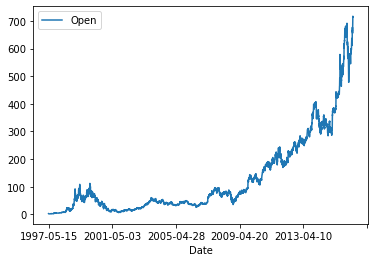

In [11]:
df_train.plot(x = "Date",y = ["Open"])

<AxesSubplot:xlabel='Date'>

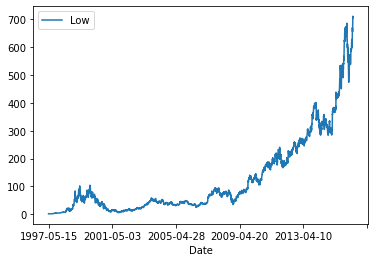

In [12]:
df_train.plot(x = "Date",y = ["Low"])

<AxesSubplot:xlabel='Date'>

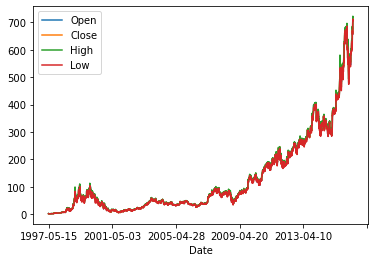

In [13]:
df_train.plot(x = "Date",y = ["Open","Close","High","Low"])

We would like to repeat the same analysis for the validation and testing set, to make sure that they follow a similar distribution and that there are no surprising errors there. We create a function to do that.

In [14]:
def analyse(dataframe):
    """Runs an exploration analysis of the dataframe."""
    print("shape", dataframe.shape,"\n")
    print("colums",dataframe.columns,"\n")
    dataframe.info()
    print("\n",dataframe.describe(),"\n")
    print("The data ranges from", dataframe["Date"].min(),"to",dataframe["Date"].max())
    dataframe.plot(x = "Date",y = ["Close","Open","High","Low"])

shape (503, 7) 

colums Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.359985   69

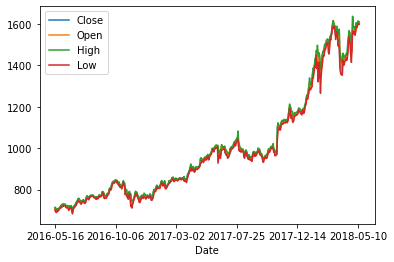

In [15]:
# read validation and test sets and then analyse them
df_val = pd.read_csv("datasets/AMZN_val.csv")
analyse(df_val)

shape (504, 7) 

colums Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB

               Open         High          Low        Close    Adj Close  \
count   504.000000   504.000000   504.000000   504.000000   504.000000   
mean   1823.927758  1843.069246  1803.067065  1824.040536  1824.040536   
std     178.129809   179.294163   177.457741   178.470078   178.470078   
min    1346.000000  1396.030029  1307.000000  1343.959961  134

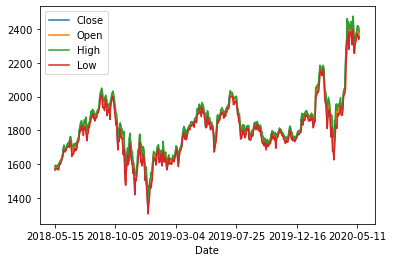

In [16]:
df_test = pd.read_csv("datasets/AMZN_test.csv")
analyse(df_test)

Once we have done our exploration of the data, we can move on to the predictive modeling part of the task. The task was to predict if the next day's closing price will be higher than the opening price. We do not have that information explicitly in our data, so we have to infer it.

This is relatively simple, we just need to compare the closing and opening prices one day in advance.

To achieve that, first, we will make sure that the data is sorted by the date. We can use the sort_values method and pass in the Date column as a parameter, sorting it in ascending order.

Next, we need to shift the DataFrame by one row / one day and compare the prices. Pandas has a method for doing exactly that, the shift method. We specify a period of minus one (so that we shift the data from the next day back). Because it is a logical operation, Pandas would return a True / False result for each comparison. We want this to be presented as 1 / 0 for the machine learning models, so we will map it to type int. To store all of this information, we will create a new column, called Target.

In [17]:
# make sure that our data is sorted by date
df_train.sort_values(by="Date", inplace=True)
df_val.sort_values(by="Date", inplace=True)
df_test.sort_values(by="Date", inplace=True)

In [18]:
# load the training set
df_train = pd.read_csv('datasets/AMZN_train.csv')
df_train.head(10)

Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200
5  1997-05-22  1.437500  1.447917  1.312500  1.395833   1.395833  11776800
6  1997-05-23  1.406250  1.520833  1.333333  1.500000   1.500000  15937200
7  1997-05-27  1.510417  1.645833  1.458333  1.583333   1.583333   8697600
8  1997-05-28  1.625000  1.635417  1.531250  1.531250   1.531250   4574400
9  1997-05-29  1.541667  1.541667  1.479167  1.505208   1.505208   3472800

In [19]:
# convert "Target" column  into integer
# df_train["Target"] = (df_train["Close"] > df_train["Open"]).astype(int)
# df_train.head(10)

In [20]:
df_train["Target"] = (df_train["Close"] > df_train["Open"])

In [21]:
## "Target" columns are shifted into 
## df_train["Target"] =  df_train["Target"].shift(periods = -1)
## df_train.head(10)

In [22]:
df_train["Target"] =  df_train["Target"].shift(periods = -1,fill_value = 0).astype(int)
df_train.head(10)

Date      Open      High       Low     Close  Adj Close    Volume  \
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   
5  1997-05-22  1.437500  1.447917  1.312500  1.395833   1.395833  11776800   
6  1997-05-23  1.406250  1.520833  1.333333  1.500000   1.500000  15937200   
7  1997-05-27  1.510417  1.645833  1.458333  1.583333   1.583333   8697600   
8  1997-05-28  1.625000  1.635417  1.531250  1.531250   1.531250   4574400   
9  1997-05-29  1.541667  1.541667  1.479167  1.505208   1.505208   3472800   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       1  
6       1  
7       0  
8       0  
9       0

In [23]:
 df_val["Target"] =  (df_val["Close"] > df_val["Open"])

In [24]:
 df_val["Target"] =  df_val["Target"].shift(periods = -1,fill_value = 0).astype(int)

In [25]:
 df_test["Target"] =  (df_test["Close"] > df_test["Open"])

In [26]:
 df_test["Target"] =  df_test["Target"].shift(periods = -1,fill_value = 0).astype(int)

In [27]:
# notice that we shift by a period of '-1', this takes the next day's price direction for the current day
# a positive period will take the days from the past
#df_train["Target"] = (df_train["Close"] > df_train["Open"]).shift(periods=-1, fill_value=0).astype(int)

In [28]:
df_train.head(10)

Date      Open      High       Low     Close  Adj Close    Volume  \
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   
5  1997-05-22  1.437500  1.447917  1.312500  1.395833   1.395833  11776800   
6  1997-05-23  1.406250  1.520833  1.333333  1.500000   1.500000  15937200   
7  1997-05-27  1.510417  1.645833  1.458333  1.583333   1.583333   8697600   
8  1997-05-28  1.625000  1.635417  1.531250  1.531250   1.531250   4574400   
9  1997-05-29  1.541667  1.541667  1.479167  1.505208   1.505208   3472800   

   Target  
0       0  
1       0  
2       0  
3       0  
4       0  
5       1  
6       1  
7       0  
8       0  
9       0

Running the value_counts method on the Target column gives us the distribution. We have 2392 days where the closing price is higher than the opening and 2389 where it is lower.

In [29]:
df_train["Target"].value_counts()

1    2392
0    2389
Name: Target, dtype: int64

In [30]:
df_test["Target"] = (df_test["Close"] > df_test["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_test["Target"].value_counts()

1    255
0    249
Name: Target, dtype: int64

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
 7   Target     504 non-null    int32  
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 33.5+ KB


At this point, we can start building some machine learning models to predict the target variable. But, before we do that, it might be useful to engineer some additional features that may help us better predict the price direction. In the next section, we will explore some possibilities for doing feature engineering.

## Feature Engineering

We know that the stock prices are time-dependent and that the next day's price depends on prices (and many other things) from previous days.

We want to somehow take into account all the values in the last `n` days, capturing the trend, or the magnitude of price change.

A simple solution would be to calculate a moving average. With Pandas, we can use the rolling method to calculate moving averages. It provides us with an interface for sliding (in Pandas terminology - rolling) window calculations. The following cells calculate the `3- and 7-days` moving average, and add them as a feature into the data set.

Remember that we have our data sorted from before. If the data is not sorted by the date, the results from the `rolling()` method would be invalid.

### moving average_3:12,13,14 tarikh er average hobe 15 tarikh er moving average
### moving average_3:13,14,15 tarikh er average hobe 16 tarikh er moving average

In [32]:
df_train["MA_3"] = (df_train['Close'] - df_train['Open']).rolling(window = 3,min_periods = 1).mean()
df_val["MA_3"] = (df_val['Close'] - df_val['Open']).rolling(window = 3,min_periods = 1).mean()
df_test["MA_3"] = (df_test['Close'] - df_test['Open']).rolling(window = 3,min_periods = 1).mean()

In [33]:
df_train["MA_7"] = (df_train['Close'] - df_train['Open']).rolling(window = 7,min_periods = 1).mean()
df_val["MA_7"] = (df_val['Close'] - df_val['Open']).rolling(window = 7,min_periods = 1).mean()
df_test["MA_7"] = (df_test['Close'] - df_test['Open']).rolling(window = 7,min_periods = 1).mean()

Feature engineering can be simpler, we can just take the current day's price direction or the price range. Anything that comes to mind, that can be considered to be useful, should be tested and tried.

In [34]:
# current price direction
df_train["Today_Direction"] = df_train["Close"] - df_train["Open"]
df_val["Today_Direction"] = df_val["Close"] - df_val["Open"]
df_test["Today_Direction"] = df_test["Close"] - df_test["Open"]

In [35]:
# price range
df_train["Price_Range"] = df_train["High"] - df_train['Low']
df_val["Price_Range"] = df_val["High"] - df_val['Low']
df_test["Price_Range"] = df_test["High"] - df_test['Low']

In [36]:
df_test

Date         Open         High          Low        Close  \
0    2018-05-15  1587.800049  1587.800049  1565.219971  1576.119995   
1    2018-05-16  1577.500000  1594.430054  1576.670044  1587.280029   
2    2018-05-17  1580.560059  1594.040039  1573.000000  1581.760010   
3    2018-05-18  1581.329956  1583.589966  1572.099976  1574.369995   
4    2018-05-21  1585.000000  1592.050049  1575.000000  1585.459961   
..          ...          ...          ...          ...          ...   
499  2020-05-08  2372.139893  2387.239990  2357.000000  2379.610107   
500  2020-05-11  2374.699951  2419.669922  2372.110107  2409.000000   
501  2020-05-12  2411.850098  2419.000000  2355.000000  2356.949951   
502  2020-05-13  2366.800049  2407.699951  2337.800049  2367.919922   
503  2020-05-14  2361.010010  2391.370117  2353.209961  2388.850098   

       Adj Close   Volume  Target       MA_3       MA_7  Today_Direction  \
0    1576.119995  5077500       1 -11.680054 -11.680054       -11.680054   
1    1587.280029  2570600       1  -0.950012  -0.950012         9.780029   
2    1581.760010  2147600       0  -0.233358  -0.233358         1.199951   
3    1574.369995  2642600       1   1.340006  -1.915009        -6.959961   
4    1585.459961  2925200       0  -1.766683  -1.440015         0.459961   
..           ...      ...     ...        ...        ...              ...   
499  2379.610107  3206600       1   7.373454   8.990060         7.470214   
500  2409.000000  3259200       0  11.533447   6.152937        34.300049   
501  2356.949951  3074900       1  -4.376628   5.561488       -54.900147   
502  2367.919922  4782900       1  -6.493408  -2.794259         1.119873   
503  2388.850098  3648100       0  -8.646729   4.354318        27.840088   

     Price_Range  
0      22.580078  
1      17.760010  
2      21.040039  
3      11.489990  
4      17.050049  
..           ...  
499    30.239990  
500    47.559815  
501    64.000000  
502    69.899902  
503    38.160156  

[504 rows x 12 columns]

### Assignment
- `BBANDS`:               Bollinger Bands
- `EMA`:                  Exponential Moving Average
- `SMA`:                  Simple Moving Average
- `RSI`:                  Relative Strength Index
- `MACD`:                 Moving Average Convergence/Divergence

In [37]:
import talib

In [38]:
from talib import MA_Type

In [39]:
df_train["bollinger_upper"],df_train["bollinger_middle"],df_train["bollinger_lower"] = talib.BBANDS(df_train["Close"], matype=MA_Type.T3)
df_val["bollinger_upper"],df_val["bollinger_middle"],df_val["bollinger_lower"] = talib.BBANDS(df_val["Close"], matype=MA_Type.T3)
df_test["bollinger_upper"],df_test["bollinger_middle"],df_test["bollinger_lower"] = talib.BBANDS(df_test["Close"], matype=MA_Type.T3)


In [40]:
### df_train.drop(["bollinger_bands_middle","bollinger_bands_upper"], axis = 1,inplace=True)

In [41]:
#EMA
df_train["EMA"] = talib.EMA(df_train["Close"],5)
df_test["EMA"] = talib.EMA(df_test["Close"],5)
df_val["EMA"] = talib.EMA(df_val["Close"],5)

In [42]:
# SMA
df_train["SMA"] = talib.SMA(df_train["Close"],5)
df_val["SMA"] = talib.SMA(df_val["Close"],5)
df_test["SMA"] = talib.SMA(df_val["Close"],5)

In [43]:
##df_train.drop("df_test",axis = 1,inplace = True)

In [44]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4781 non-null   object 
 1   Open              4781 non-null   float64
 2   High              4781 non-null   float64
 3   Low               4781 non-null   float64
 4   Close             4781 non-null   float64
 5   Adj Close         4781 non-null   float64
 6   Volume            4781 non-null   int64  
 7   Target            4781 non-null   int32  
 8   MA_3              4781 non-null   float64
 9   MA_7              4781 non-null   float64
 10  Today_Direction   4781 non-null   float64
 11  Price_Range       4781 non-null   float64
 12  bollinger_upper   4757 non-null   float64
 13  bollinger_middle  4757 non-null   float64
 14  bollinger_lower   4757 non-null   float64
 15  EMA               4777 non-null   float64
 16  SMA               4777 non-null   float64


In [45]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              4781 non-null   object 
 1   Open              4781 non-null   float64
 2   High              4781 non-null   float64
 3   Low               4781 non-null   float64
 4   Close             4781 non-null   float64
 5   Adj Close         4781 non-null   float64
 6   Volume            4781 non-null   int64  
 7   Target            4781 non-null   int32  
 8   MA_3              4781 non-null   float64
 9   MA_7              4781 non-null   float64
 10  Today_Direction   4781 non-null   float64
 11  Price_Range       4781 non-null   float64
 12  bollinger_upper   4757 non-null   float64
 13  bollinger_middle  4757 non-null   float64
 14  bollinger_lower   4757 non-null   float64
 15  EMA               4777 non-null   float64
 16  SMA               4777 non-null   float64


In [46]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(4781, 17)
(503, 17)
(504, 17)


In [47]:
# MACD
df_train["MACD"], df_train["MACD_signal"], df_train["MACD_hist"] = talib.MACD(df_train["Close"])
df_val["MACD"], df_val["MACD_signal"], df_val["MACD_hist"] = talib.MACD(df_val["Close"])
df_test["MACD"], df_test["MACD_signal"], df_test["MACD_hist"] = talib.MACD(df_test["Close"])


In [48]:
##df_train["MACD"], df_train["MACD_signal"], df_train["hist"] = talib.MACD(df_train["Close"])

In [49]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(4781, 20)
(503, 20)
(504, 20)


In [50]:
## df_train.drop("hist",axis = 1,inplace = True)
## df_val.drop("hist",axis = 1,inplace = True)
## df_test.drop("hist",axis = 1,inplace = True)
## df_train.columns
## df_val.columns
## df_val

In [51]:
df_train = df_train.iloc[:,:20].fillna(0)
df_val = df_val.iloc[:,:20].fillna(0)
df_test = df_test.iloc[:,:20].fillna(0)

In [52]:
df_train

Date        Open        High         Low       Close   Adj Close  \
0     1997-05-15    2.437500    2.500000    1.927083    1.958333    1.958333   
1     1997-05-16    1.968750    1.979167    1.708333    1.729167    1.729167   
2     1997-05-19    1.760417    1.770833    1.625000    1.708333    1.708333   
3     1997-05-20    1.729167    1.750000    1.635417    1.635417    1.635417   
4     1997-05-21    1.635417    1.645833    1.375000    1.427083    1.427083   
...          ...         ...         ...         ...         ...         ...   
4776  2016-05-09  673.950012  686.979980  671.409973  679.750000  679.750000   
4777  2016-05-10  694.000000  704.549988  693.500000  703.070007  703.070007   
4778  2016-05-11  705.789978  719.000000  701.650024  713.229980  713.229980   
4779  2016-05-12  717.380005  722.450012  711.510010  717.929993  717.929993   
4780  2016-05-13  714.640015  719.250000  706.510010  709.919983  709.919983   

        Volume  Target       MA_3      MA_7  Today_Direction  Price_Range  \
0     72156000       0  -0.479167 -0.479167        -0.479167     0.572917   
1     14700000       0  -0.359375 -0.359375        -0.239583     0.270834   
2      6106800       0  -0.256945 -0.256945        -0.052084     0.145833   
3      5467200       0  -0.128472 -0.216146        -0.093750     0.114583   
4     18853200       0  -0.118056 -0.214584        -0.208334     0.270833   
...        ...     ...        ...       ...              ...          ...   
4776   3982200       1   3.160014  3.610011         5.799988    15.570007   
4777   6105600       1  10.923340  5.821437         9.070007    11.049988   
4778   7338200       1   7.436666  4.037153         7.440002    17.349976   
4779   5048200       0   5.686666  4.978576         0.549988    10.940002   
4780   4763400       0   1.089986  3.117144        -4.720032    12.739990   

      bollinger_upper  bollinger_middle  bollinger_lower         EMA  \
0            0.000000          0.000000         0.000000    0.000000   
1            0.000000          0.000000         0.000000    0.000000   
2            0.000000          0.000000         0.000000    0.000000   
3            0.000000          0.000000         0.000000    0.000000   
4            0.000000          0.000000         0.000000    1.691667   
...               ...               ...              ...         ...   
4776       685.295671        671.813092       658.330514  669.612183   
4777       707.780999        678.744919       649.708838  680.764791   
4778       727.114945        687.708319       648.301693  691.586521   
4779       732.840593        697.451676       662.062758  700.367678   
4780       732.232002        705.396668       678.561335  703.551780   

             SMA       MACD  MACD_signal  MACD_hist  
0       0.000000   0.000000     0.000000   0.000000  
1       0.000000   0.000000     0.000000   0.000000  
2       0.000000   0.000000     0.000000   0.000000  
3       0.000000   0.000000     0.000000   0.000000  
4       1.691667   0.000000     0.000000   0.000000  
...          ...        ...          ...        ...  
4776  671.002014  21.245916    17.791909   3.454007  
4777  677.352014  23.577981    18.949123   4.628858  
4778  685.818005  25.946885    20.348676   5.598209  
4779  697.585998  27.882102    21.855361   6.026741  
4780  704.779993  28.441578    23.172604   5.268974  

[4781 rows x 20 columns]

## Classical Machine Learning Algorithms

The `sklearn` library is the most popular library in Python for implementing classical machine learning algorithms. We can use it to try and test a few of them. In the following cells we implement:

- Logistic regression
- Decision tree
- Random forest
- Gradient boosting ensemble
After fitting them to the training data, we are going to evaluate their performance on the validation set by estimating the `AUC` metric.

In [53]:
# this is the target column that we aim to predict
y_col = "Target"
# these are the input features for the models
x_cols = [
     'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 
       'MA_3', 'MA_7', 'Today_Direction', 'Price_Range', 'bollinger_upper',
       'bollinger_middle', 'bollinger_lower', 'EMA', 'SMA', 'MACD',
       'MACD_signal', 'MACD_hist'
]

In [54]:
x_cols

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'MA_3',
 'MA_7',
 'Today_Direction',
 'Price_Range',
 'bollinger_upper',
 'bollinger_middle',
 'bollinger_lower',
 'EMA',
 'SMA',
 'MACD',
 'MACD_signal',
 'MACD_hist']

In [55]:
## train data set :
x_train = df_train[x_cols]
y_train = df_train[y_col]

## validation data set:
x_val = df_val[x_cols]
y_val = df_val[y_col]

## test data set:
x_test = df_test[x_cols]
y_test = df_test[y_col]

### Logistic Regression
We start our modeling phase with a `LogisticRegression` model.

In [56]:
# for reproducibility
RANDOM_SEED = 42

In [57]:
df_val["Target"]

0      0
1      1
2      1
3      1
4      0
      ..
498    1
499    1
500    0
501    0
502    0
Name: Target, Length: 503, dtype: int32

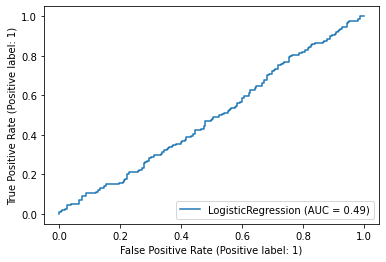

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

# use default parameters
lr = LogisticRegression(verbose=0)

# fit to train set
lr.fit(x_train, y_train)

# plot ROC curve, and show AUC for the validation set
plot_roc_curve(lr, x_val, y_val)

Logistic regression does not work well for this problem. Having `AUC < 0.5` means that the classifier is worse than just randomly guessing the output. Given that we are dealing with a very difficult problem, any `AUC > 0.5` would suffice for this task.

### Decision Tree

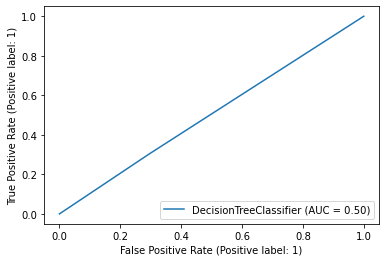

In [61]:
from sklearn.tree import DecisionTreeClassifier

# use default parameters
dt = DecisionTreeClassifier(random_state = RANDOM_SEED)

# fit to train set
dt.fit(x_train,y_train)

# plot ROC curve, and show AUC for the validation set
plot_roc_curve(dt,x_val,y_val)


The decision tree outperforms the logistic regression model by `0.02`, and its `AUC` is above `0.5!`

### Random Forest
Now we will try to use many decision trees, i.e., a forest. Random forest is an ensemble model that builds multiple decision trees, each with a different (random) sub-set of attributes.

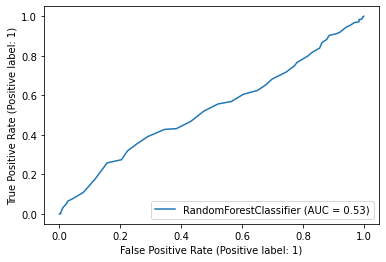

In [64]:
from sklearn.ensemble import RandomForestClassifier

#use default parameter
dt = RandomForestClassifier(random_state = RANDOM_SEED)

#fit to train set
dt.fit(x_train,y_train)

# plot ROC curve, and show AUC for the validation set
plot_roc_curve(dt,x_val,y_val)


### Gradient Boosting Ensemble

One last ensemble technique that we would like to try is gradient boosting. This algorithm sets up the stage for our next part, where we will try a deep learning approach to solve the problem.

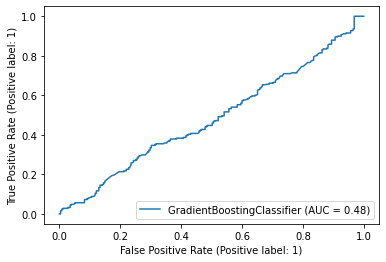

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

#use default parameter
gb = GradientBoostingClassifier(random_state = 42,learning_rate = 0.02,n_estimators=90, max_depth=5)

#fit to training set
gb.fit(x_train,y_train)

#plot rov curve and AUC for the validation set
plot_roc_curve(gb,x_val,y_val)

Indeed it does, the gradient boosting classifier outperform previous models and scored `0.48` AUC!

We find out that gradient boosting works best for this data set. In the next section, we will train a deep learning model with the aim to outperform the baseline set here, i.e., `AUC = 0.48.`

### adaboosting ensemble

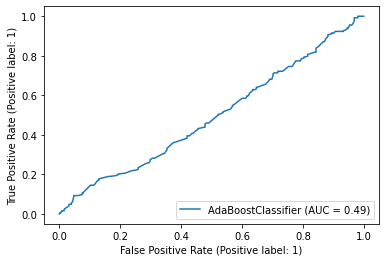

In [69]:
from sklearn.ensemble import AdaBoostClassifier

# use default parameter
ab = AdaBoostClassifier(random_state=RANDOM_SEED, learning_rate=0.01, n_estimators=500)

# fit to train data set
ab.fit(x_train,y_train)

#plot roc curve and AUC validation set
plot_roc_curve(ab,x_val,y_val)

Learning Rate:  0.1 Max Depth:  3 N_estimators:  80
Learning Rate:  0.1 Max Depth:  3 N_estimators:  100
Learning Rate:  0.1 Max Depth:  3 N_estimators:  50
Learning Rate:  0.1 Max Depth:  5 N_estimators:  80
Learning Rate:  0.1 Max Depth:  5 N_estimators:  100
Learning Rate:  0.1 Max Depth:  5 N_estimators:  50
Learning Rate:  0.1 Max Depth:  7 N_estimators:  80
Learning Rate:  0.1 Max Depth:  7 N_estimators:  100
Learning Rate:  0.1 Max Depth:  7 N_estimators:  50
Learning Rate:  0.2 Max Depth:  3 N_estimators:  80
Learning Rate:  0.2 Max Depth:  3 N_estimators:  100
Learning Rate:  0.2 Max Depth:  3 N_estimators:  50
Learning Rate:  0.2 Max Depth:  5 N_estimators:  80
Learning Rate:  0.2 Max Depth:  5 N_estimators:  100
Learning Rate:  0.2 Max Depth:  5 N_estimators:  50
Learning Rate:  0.2 Max Depth:  7 N_estimators:  80
Learning Rate:  0.2 Max Depth:  7 N_estimators:  100
Learning Rate:  0.2 Max Depth:  7 N_estimators:  50
Learning Rate:  0.3 Max Depth:  3 N_estimators:  80
Learni

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_plot\roc_curve.py:117: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Learning Rate:  0.3 Max Depth:  5 N_estimators:  80
Learning Rate:  0.3 Max Depth:  5 N_estimators:  100
Learning Rate:  0.3 Max Depth:  5 N_estimators:  50
Learning Rate:  0.3 Max Depth:  7 N_estimators:  80
Learning Rate:  0.3 Max Depth:  7 N_estimators:  100
Learning Rate:  0.3 Max Depth:  7 N_estimators:  50
Learning Rate:  0.5 Max Depth:  3 N_estimators:  80
Learning Rate:  0.5 Max Depth:  3 N_estimators:  100
Learning Rate:  0.5 Max Depth:  3 N_estimators:  50
Learning Rate:  0.5 Max Depth:  5 N_estimators:  80
Learning Rate:  0.5 Max Depth:  5 N_estimators:  100
Learning Rate:  0.5 Max Depth:  5 N_estimators:  50
Learning Rate:  0.5 Max Depth:  7 N_estimators:  80
Learning Rate:  0.5 Max Depth:  7 N_estimators:  100
Learning Rate:  0.5 Max Depth:  7 N_estimators:  50
Learning Rate:  0.7 Max Depth:  3 N_estimators:  80
Learning Rate:  0.7 Max Depth:  3 N_estimators:  100
Learning Rate:  0.7 Max Depth:  3 N_estimators:  50
Learning Rate:  0.7 Max Depth:  5 N_estimators:  80
Learni

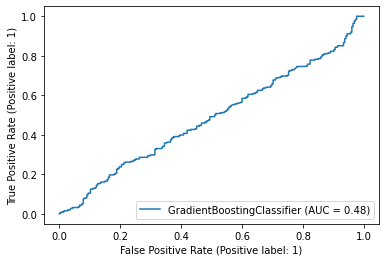

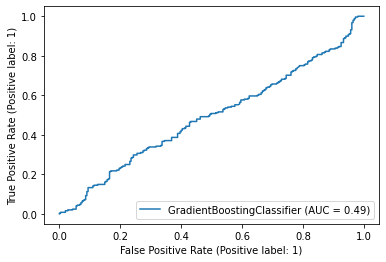

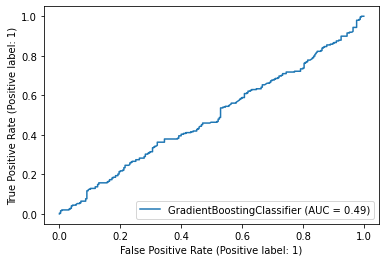

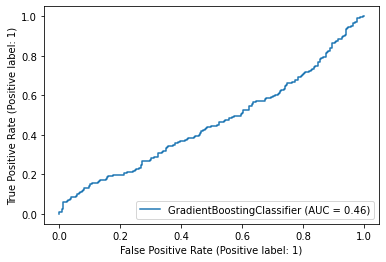

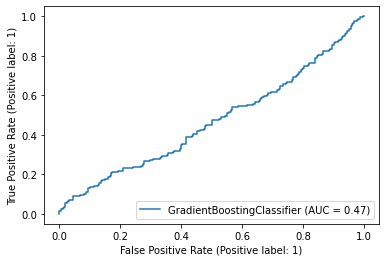

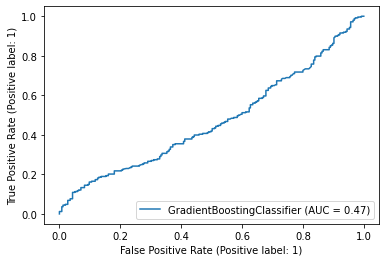

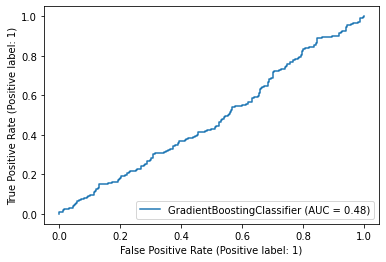

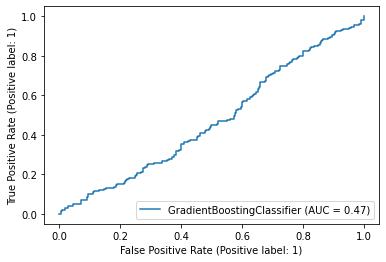

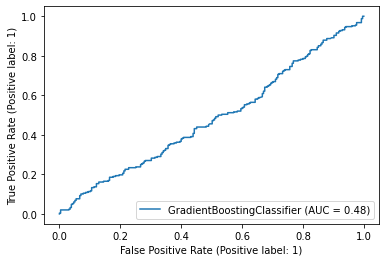

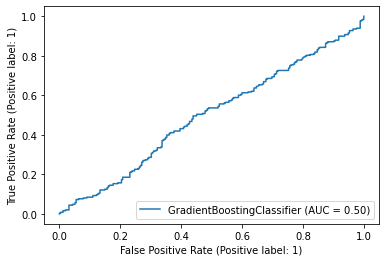

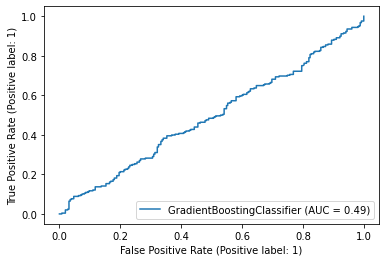

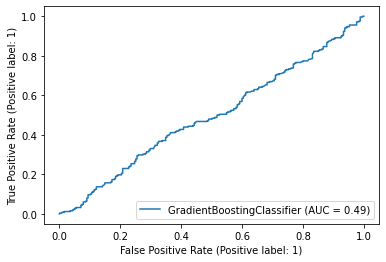

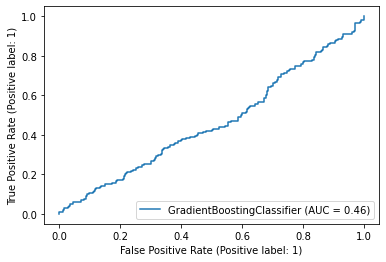

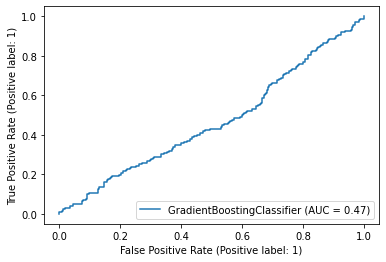

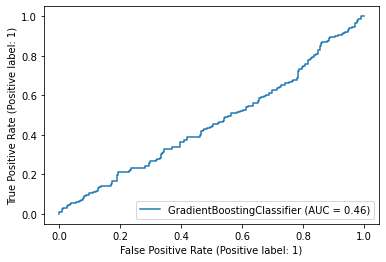

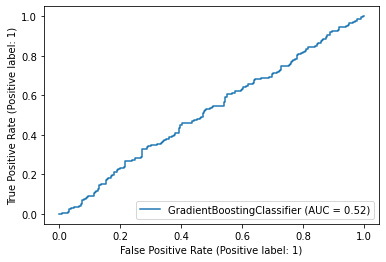

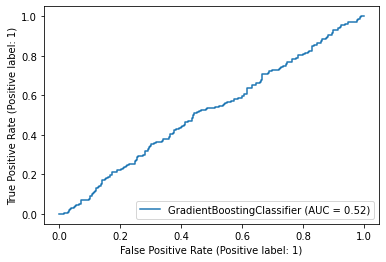

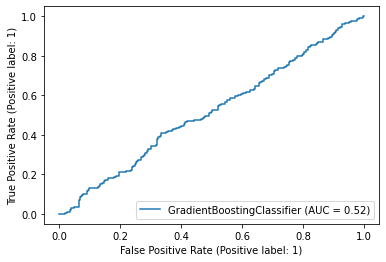

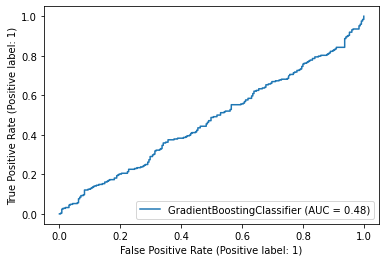

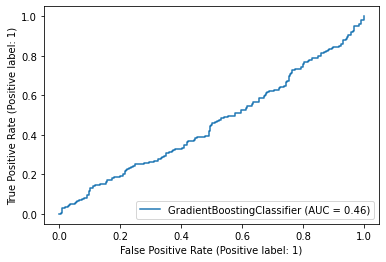

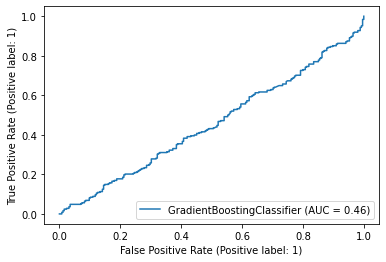

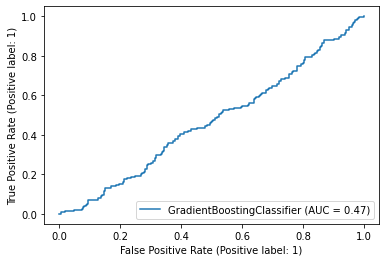

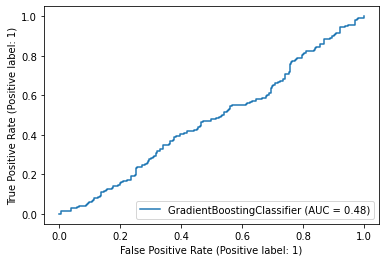

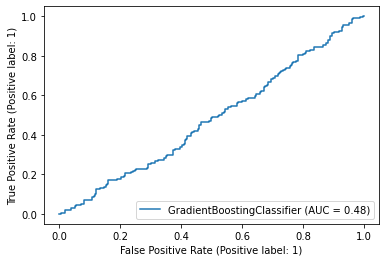

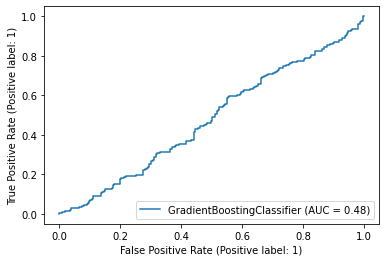

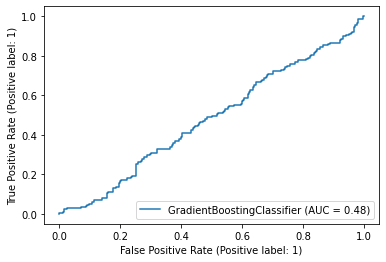

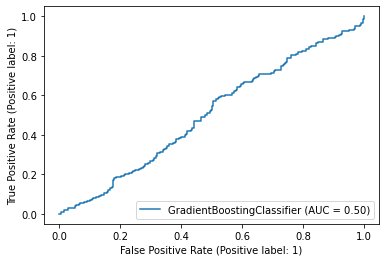

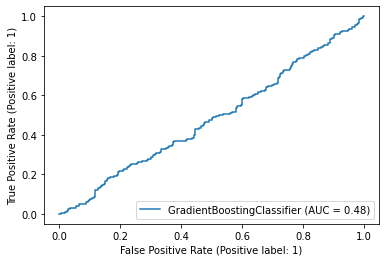

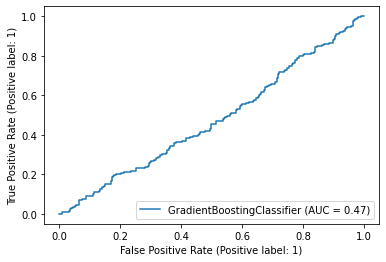

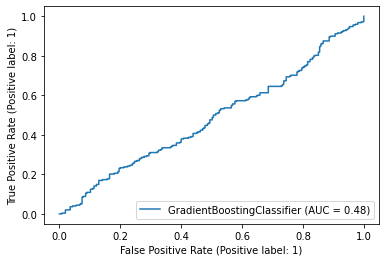

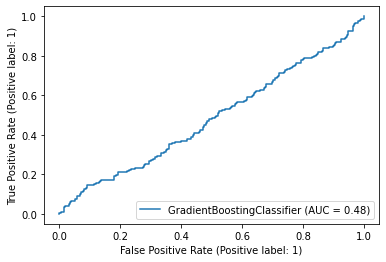

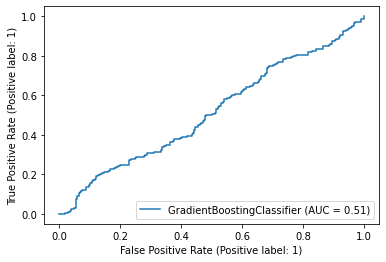

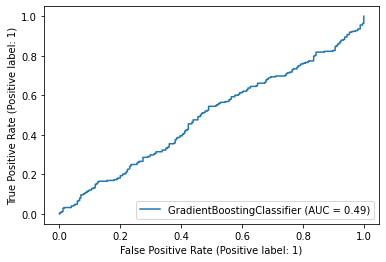

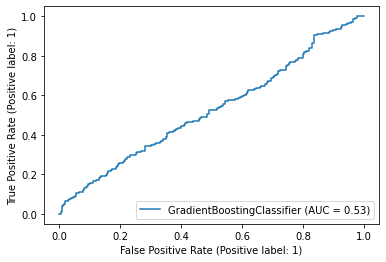

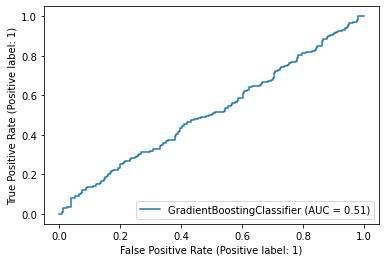

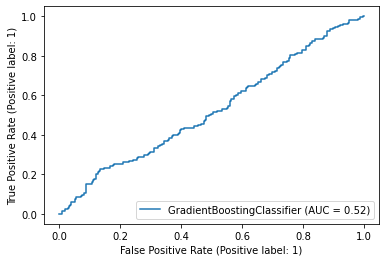

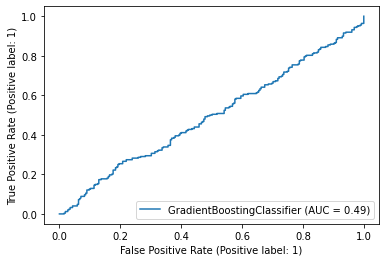

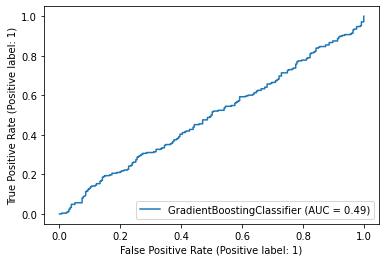

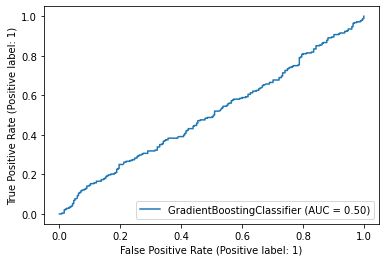

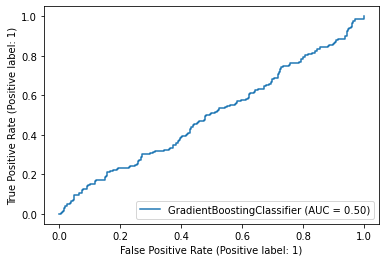

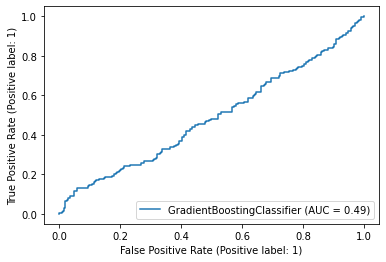

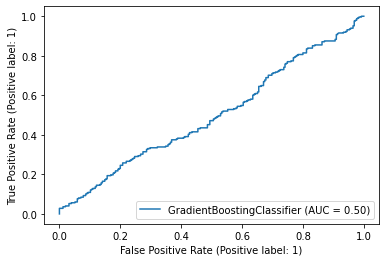

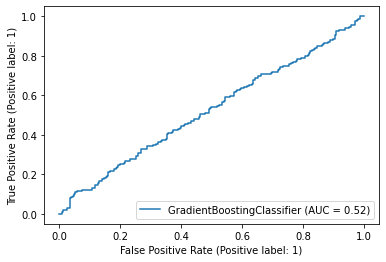

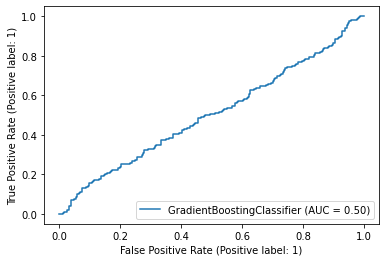

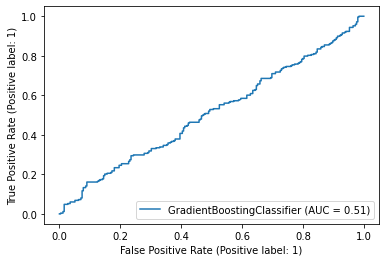

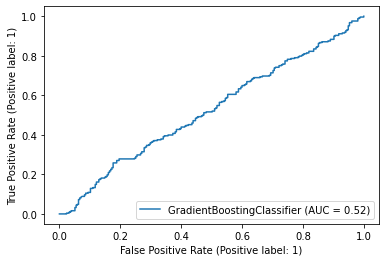

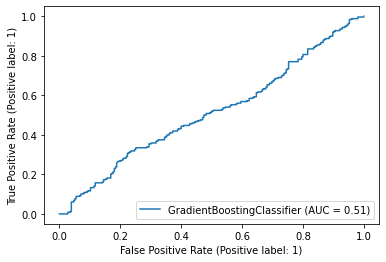

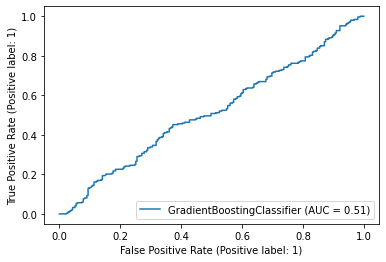

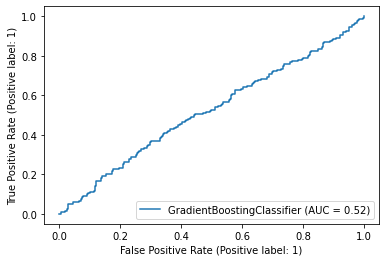

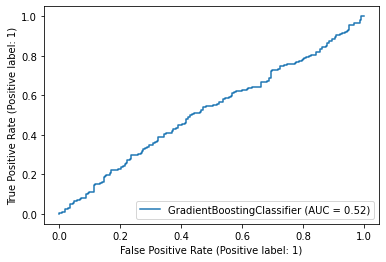

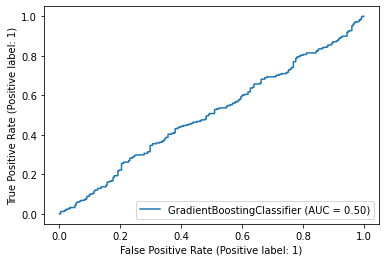

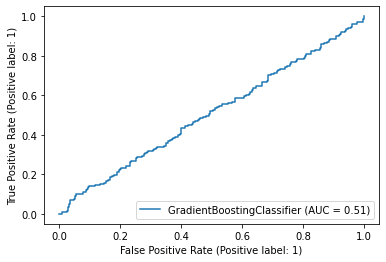

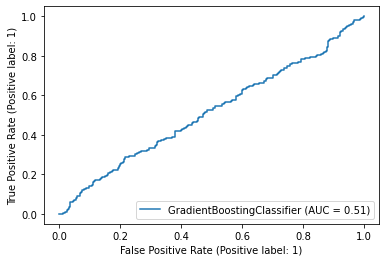

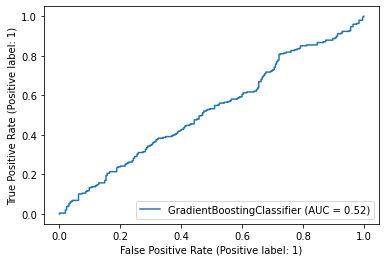

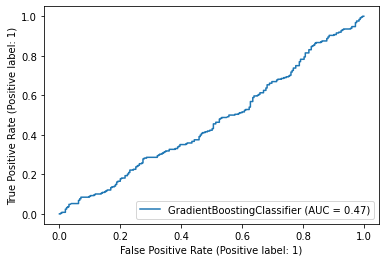

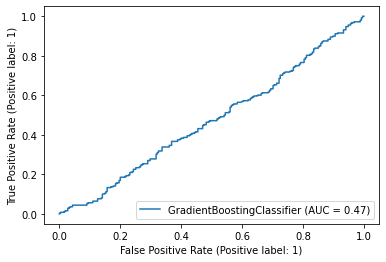

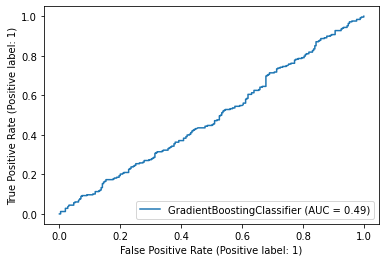

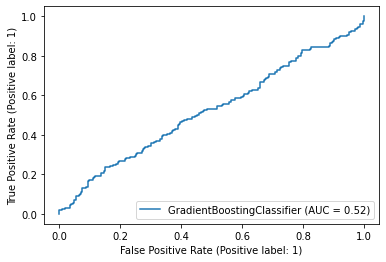

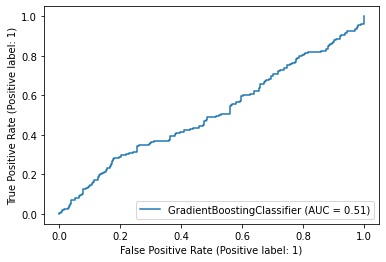

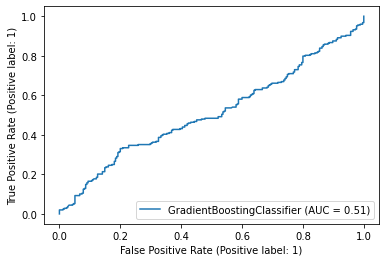

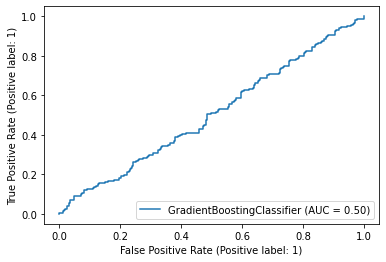

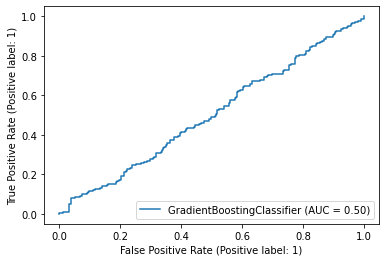

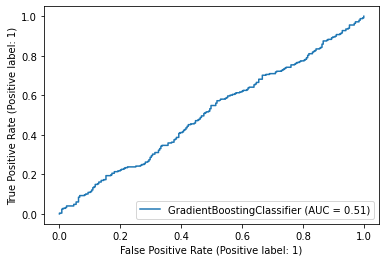

In [97]:
import time

st = time.time()

learning_rate_lst = [0.1,0.2,0.3,0.5,0.7,0.8,1]
max_depth_lst = [3, 5, 7]
n_estimators_lst = [80, 100, 50]

for lr in learning_rate_lst:
    for md in max_depth_lst:
        for ne in n_estimators_lst:
            # use default parameter
            gb = GradientBoostingClassifier(random_state = 42,n_estimators = ne,max_depth= md,learning_rate = lr)
            # fit to train 
            gb.fit(x_train,y_train)
            #plot roc curve
            print("Learning Rate: ", lr, "Max Depth: ", md, "N_estimators: ", ne)
            plot_roc_curve(gb,x_val,y_val)
print(f"=============={time.time()-st}=============")

In [101]:
from sklearn.model_selection import GridSearchCV
param = {
     "learning_rate": [0.1, 1, 10],
    "max_depth": [3, 5],
    "n_estimators": [80, 100],
    
}
grid = GridSearchCV(gb,param_grid = param)
grid.fit(x_train, y_train)
sorted(grid.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_learning_rate',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## Conclusion
## The random forest classifier provided the best AUC score on the validation set. 
It is a common machine learning practice to train multiple models on the same train/validation data set and provide a model that works best. To simulate a production environment, we have held the test set aside until now.

In the next cell, we are going to evaluate the performance of the gradient boosting classifier on the test set. This is simple as calling plot_roc_curve with the test set instead of the validation one.

In [ ]:
from sklearn.metrics import auc

auc(x_val, y_val)

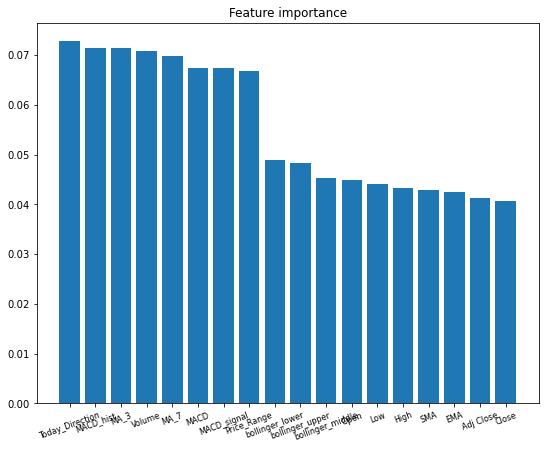

In [102]:
import numpy as np
# Calculate feature importances
importances = dt.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [df_train[x_cols].columns[i] for i in indices]

_ = plt.figure(figsize=(9, 7))
plt.bar(names, importances[indices])
_ = plt.title("Feature importance")
_ = plt.xticks(rotation=20, fontsize = 8)

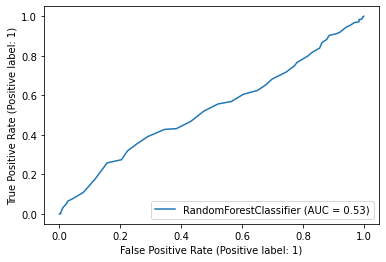

In [103]:

# plot ROC curve, and show AUC for the validation set
plot_roc_curve(dt,x_val,y_val)

In [ ]:
>>> import numpy as np
>>> from sklearn import metrics
>>> y = np.array([1, 1, 2, 2])
>>> pred = np.array([0.1, 0.4, 0.35, 0.8])
>>> fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
>>> metrics.auc(fpr, tpr)

In [106]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)

Open        High         Low       Close   Adj Close    Volume  \
0       2.437500    2.500000    1.927083    1.958333    1.958333  72156000   
1       1.968750    1.979167    1.708333    1.729167    1.729167  14700000   
2       1.760417    1.770833    1.625000    1.708333    1.708333   6106800   
3       1.729167    1.750000    1.635417    1.635417    1.635417   5467200   
4       1.635417    1.645833    1.375000    1.427083    1.427083  18853200   
...          ...         ...         ...         ...         ...       ...   
4776  673.950012  686.979980  671.409973  679.750000  679.750000   3982200   
4777  694.000000  704.549988  693.500000  703.070007  703.070007   6105600   
4778  705.789978  719.000000  701.650024  713.229980  713.229980   7338200   
4779  717.380005  722.450012  711.510010  717.929993  717.929993   5048200   
4780  714.640015  719.250000  706.510010  709.919983  709.919983   4763400   

           MA_3      MA_7  Today_Direction  Price_Range  bollinger_upper  \
0     -0.479167 -0.479167        -0.479167     0.572917         0.000000   
1     -0.359375 -0.359375        -0.239583     0.270834         0.000000   
2     -0.256945 -0.256945        -0.052084     0.145833         0.000000   
3     -0.128472 -0.216146        -0.093750     0.114583         0.000000   
4     -0.118056 -0.214584        -0.208334     0.270833         0.000000   
...         ...       ...              ...          ...              ...   
4776   3.160014  3.610011         5.799988    15.570007       685.295671   
4777  10.923340  5.821437         9.070007    11.049988       707.780999   
4778   7.436666  4.037153         7.440002    17.349976       727.114945   
4779   5.686666  4.978576         0.549988    10.940002       732.840593   
4780   1.089986  3.117144        -4.720032    12.739990       732.232002   

      bollinger_middle  bollinger_lower         EMA         SMA       MACD  \
0             0.000000         0.000000    0.000000    0.000000   0.000000   
1             0.000000         0.000000    0.000000    0.000000   0.000000   
2             0.000000         0.000000    0.000000    0.000000   0.000000   
3             0.000000         0.000000    0.000000    0.000000   0.000000   
4             0.000000         0.000000    1.691667    1.691667   0.000000   
...                ...              ...         ...         ...        ...   
4776        671.813092       658.330514  669.612183  671.002014  21.245916   
4777        678.744919       649.708838  680.764791  677.352014  23.577981   
4778        687.708319       648.301693  691.586521  685.818005  25.946885   
4779        697.451676       662.062758  700.367678  697.585998  27.882102   
4780        705.396668       678.561335  703.551780  704.779993  28.441578   

      MACD_signal  MACD_hist  
0        0.000000   0.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        0.000000   0.000000  
...           ...        ...  
4776    17.791909   3.454007  
4777    18.949123   4.628858  
4778    20.348676   5.598209  
4779    21.855361   6.026741  
4780    23.172604   5.268974  

[4781 rows x 18 columns]

In [ ]:
from sklearn.metrics import auc

auc(x_val, y_val)